In [1]:
import math
from collections import Counter


def knn(data, query, k, distance_fn, choice_fn):
    neighbor_distances_and_indices = []

    # 3. For each example in the data
    for index, example in enumerate(data):
        # 3.1 Calculate the distance between the query example and the current
        # example from the data.
        distance = distance_fn(example[:-1], query)

        # 3.2 Add the distance and the index of the example to an ordered collection
        neighbor_distances_and_indices.append((distance, index))

    # 4. Sort the ordered collection of distances and indices from
    # smallest to largest (in ascending order) by the distances
    sorted_neighbor_distances_and_indices = sorted(neighbor_distances_and_indices)

    # 5. Pick the first K entries from the sorted collection
    k_nearest_distances_and_indices = sorted_neighbor_distances_and_indices[:k]

    # 6. Get the labels of the selected K entries
    k_nearest_labels = [data[i][-1] for distance, i in k_nearest_distances_and_indices]

    # 7. If regression (choice_fn = mean), return the average of the K labels
    # 8. If classification (choice_fn = mode), return the mode of the K labels
    return k_nearest_distances_and_indices, choice_fn(k_nearest_labels)


def mean(labels):
    return sum(labels) / len(labels)


def mode(labels):
    return Counter(labels).most_common(1)[0][0]


def euclidean_distance(point1, point2):
    sum_squared_distance = 0
    for i in range(len(point1)):
        sum_squared_distance += math.pow(point1[i] - point2[i], 2)
    return math.sqrt(sum_squared_distance)

In [24]:
"""
# Regression Data
# 
# Column 0: height (inches)
# Column 1: weight (pounds)
"""

reg_data = [
    [65.75, 112.99],
    [71.52, 136.49],
    [69.40, 153.03],
    [68.22, 142.34],
    [67.79, 144.30],
    [68.70, 123.30],
    [69.80, 141.49],
    [70.01, 136.46],
    [67.90, 112.37],
    [66.49, 127.45],
]

# Question:
# Given the data we have, what's the best-guess at someone's weight if they are 60 inches tall?
reg_query = [60]
reg_k_nearest_neighbors, reg_prediction = knn(
    reg_data, reg_query, k=3, distance_fn=euclidean_distance, choice_fn=mean
)

"""
# Classification Data
# 
# Column 0: age
# Column 1: likes pineapple
"""
clf_data = [
    [22, 1],
    [23, 1],
    [21, 1],
    [18, 1],
    [19, 1],
    [25, 0],
    [27, 0],
    [29, 0],
    [31, 0],
    [45, 0],
]
# Question:
# Given the data we have, does a 33 year old like pineapples on their pizza?
clf_query = [33]
clf_k_nearest_neighbors, clf_prediction = knn(
    clf_data, clf_query, k=3, distance_fn=euclidean_distance, choice_fn=mode
)
print(clf_prediction)

0


In [3]:
X = [[0], [1], [2], [3]]
y = [0, 0, 1, 1]
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X, y)
print(neigh.predict([[1.6]]))

[1]


In [4]:
X = [0, 1, 2, 3]
y = [0, 0, 1, 1]
import numpy as np

# np.array(X, y)
# knn(data, query, k, distance_fn, choice_fn)

data = np.transpose(np.array([X, y]))
test = [1.6]
test_knn, test_prediction = knn(
    data, test, k=3, distance_fn=euclidean_distance, choice_fn=mode
)
print(test_prediction)
print(test_knn)

1
[(0.3999999999999999, 2), (0.6000000000000001, 1), (1.4, 3)]


In [5]:
euclidean_distance([2, 2], [-2, 4])

4.47213595499958

In [23]:
X_clf = np.array(clf_data)[:, 0].reshape(-1, 1)
y_clf = np.array(clf_data)[:, 1]
clf_neigh = KNeighborsClassifier(n_neighbors=3)
clf_neigh.fit(X_clf, y_clf)
print(clf_neigh.predict([[33]]))

[0]


In [3]:
import numpy as np

random_values = np.random.normal(100, 10, 100)
groups = []
for value in random_values:
    if value > 110:
        groups.append(0)
    elif value > 100:
        groups.append(1)
    else:
        groups.append(2)
groups

from sklearn.neighbors import KNeighborsClassifier

random_values = random_values.reshape(-1, 1)
random_neigh = KNeighborsClassifier(n_neighbors=5)
random_neigh.fit(random_values, groups)

KNeighborsClassifier()

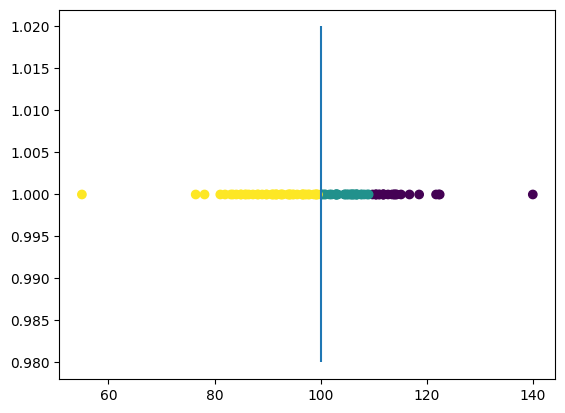

<Figure size 640x480 with 0 Axes>

In [4]:
import matplotlib.pyplot as plt

plt.scatter(
    random_values,
    np.repeat(1, len(random_values)),
    c=random_neigh.predict(random_values),
)
plt.scatter([55, 140], [1, 1], c=random_neigh.predict([[55], [140]]))
plt.vlines(100, 0.98, 1.02)
plt.show()
plt.savefig("knn.png")

In [45]:
random_neigh.predict([[60]])

array([1])